## Usage of one explainer

Take EFM and Exp_EFM as an example, and use dataset amazon_toy.

In [1]:
from cornac.datasets import amazon_toy
from cornac.data.reader import Reader
from cornac.eval_methods import StratifiedSplit
from cornac.data.sentiment import SentimentModality
from cornac.models import EFM
from cornac.explainer import Exp_EFM

# Load the Amazon toy dataset
rating = amazon_toy.load_feedback(fmt="UIRT", reader=Reader(min_user_freq=20))
sentiment_data = amazon_toy.load_sentiment(reader=Reader(min_user_freq=20))
md = SentimentModality(data=sentiment_data)

eval_method = StratifiedSplit(
    data=rating,
    group_by="user",
    chrono=True,
    sentiment=md,
    test_size=0.2,
    exclude_unknowns=True,
    verbose=True,
)

# Instantiate the EFM model
efm = EFM(max_iter=20)
efm.fit(eval_method.train_set)

# Instantiate the explainer
explainer = Exp_EFM(rec_model=efm, dataset=eval_method.train_set)


/Users/athina/Desktop/ROSE/clean_venv_1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 974
Number of items = 7861
Number of ratings = 26231
Max rating = 5.0
Min rating = 1.0
Global mean = 4.3
---
Test data:
Number of users = 974
Number of items = 7861
Number of ratings = 4840
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 974
Total items = 7861


### Explain recommendations

In [2]:
# first, we need some recommendations
some_users = eval_method.test_set.user_ids[:3]
recomendations = efm.recommend_to_multiple_users(some_users, k=5)
print(recomendations)

           user_id     item_id  prediction
0   A2TXMYYGSZCSZ1  B0000524NG    4.960433
1   A2TXMYYGSZCSZ1  B001L123JS    4.830313
2   A2TXMYYGSZCSZ1  B006XG3NRC    4.393148
3   A2TXMYYGSZCSZ1  B002RL7VUM    4.360544
4   A2TXMYYGSZCSZ1  B005MQYCY2    4.282104
5    A2C27IQUH9N1Z  B0000524NG    4.650578
6    A2C27IQUH9N1Z  B001L123JS    4.516901
7    A2C27IQUH9N1Z  B002RL7VUM    3.954502
8    A2C27IQUH9N1Z  B007Q0OJJA    3.936964
9    A2C27IQUH9N1Z  B000056JLL    3.916684
10   ABSFFH7ECSE49  B0000524NG    4.511815
11   ABSFFH7ECSE49  B001L123JS    4.358469
12   ABSFFH7ECSE49  B002RL7VUM    4.055123
13   ABSFFH7ECSE49  B005MQYCY2    3.922449
14   ABSFFH7ECSE49  B007Q0OJJA    3.882319


In [3]:
# now, we can explain the recommendations
explainer.explain_recommendations(recomendations)

Computing explanations: 100%|██████████| 15/15 [00:00<00:00, 291.74it/s]


,user_id,item_id,prediction,explanations
0,A2TXMYYGSZCSZ1,B0000524NG,4.960433,"{'toy': 6.230582, 'game': 5.373725, 'dolls': 4..."
1,A2TXMYYGSZCSZ1,B001L123JS,4.830313,"{'toy': 5.4920206, 'game': 5.1880274, 'dolls':..."
2,A2TXMYYGSZCSZ1,B006XG3NRC,4.393148,"{'toy': 5.866706, 'game': 4.4922686, 'dolls': ..."
3,A2TXMYYGSZCSZ1,B002RL7VUM,4.360544,"{'toy': 6.110224, 'game': 5.102624, 'dolls': 5..."
4,A2TXMYYGSZCSZ1,B005MQYCY2,4.282104,"{'toy': 5.6326995, 'game': 5.3733144, 'dolls':..."
5,A2C27IQUH9N1Z,B0000524NG,4.650578,"{'toy': 6.230582, 'really': 6.131947, 'product..."
6,A2C27IQUH9N1Z,B001L123JS,4.516901,"{'toy': 5.4920206, 'really': 4.8915067, 'produ..."
7,A2C27IQUH9N1Z,B002RL7VUM,3.954502,"{'toy': 6.110224, 'really': 6.14546, 'product'..."
8,A2C27IQUH9N1Z,B007Q0OJJA,3.936964,"{'toy': 5.325242, 'really': 5.2603374, 'produc..."
9,A2C27IQUH9N1Z,B000056JLL,3.916684,"{'toy': 5.9273486, 'really': 5.3293986, 'produ..."


### Explain one user-item pair

In [4]:
# we can explain one recommendation using the 4 most important features
one_user = eval_method.train_set.user_ids[0]
one_item = eval_method.train_set.item_ids[0]
explanation = explainer.explain_one_recommendation_to_user(one_user, one_item, feature_k=4)
print(f"For User {one_user} and Item {one_item}:")
print("Explanation:")
print(explanation)

For User A2TXMYYGSZCSZ1 and Item B00004TZY8:
Explanation:
{'toy': 4.7864256, 'game': 4.6439304, 'dolls': 4.0798206, 'way': 4.4778576}


### Explain one user-item with ref-item

In [5]:
# we can also explain a recommendation using a reference item
one_user = eval_method.train_set.user_ids[0]
one_item = eval_method.train_set.item_ids[0]
ref_item = eval_method.train_set.item_ids[10]
explanation = explainer.explain_one_with_ref(user_id=one_user, item_id=one_item, ref_item_id=ref_item)
explanation

,user_id,item_id,explanation,ref_item_id,ref_explanation
0,A2TXMYYGSZCSZ1,B00004TZY8,"{'toy': 4.7864256, 'game': 4.6439304, 'dolls':...",B004OS8J98,"{'toy': 4.613607, 'game': 4.278559, 'dolls': 4..."


In [6]:
# explanation for user-item
print(explanation['explanation'])
# and explanation for user-ref_item
print(explanation['ref_explanation'])

0    {'toy': 4.7864256, 'game': 4.6439304, 'dolls':...
Name: explanation, dtype: object
0    {'toy': 4.613607, 'game': 4.278559, 'dolls': 4...
Name: ref_explanation, dtype: object


### Generate plot for Exp_EFM

In [7]:
# add also add some visualisations
users = eval_method.test_set.user_ids
recommendations = efm.recommend_to_multiple_users(users, k=10)
explanations = explainer.explain_recommendations(recommendations, feature_k=8)
explanations_df = explanations.copy()

Computing explanations: 100%|██████████| 9740/9740 [00:01<00:00, 5452.74it/s]


In [8]:
from cornac.visualization import Visualization
my_plots = Visualization()

# Create a plot for a specific user and item
one_user = eval_method.train_set.user_ids[15]
one_item = eval_method.train_set.item_ids[0]
find_df = my_plots.create_individual_feature_importance_plot(
    explanations,
    user_id=one_user,
    item_id=one_item,
    type="bar",
    top_k=8,
    save_plot=False,
)

/Users/athina/Desktop/ROSE/clean_venv_1/lib/python3.9/site-packages/cornac-2.0.0-py3.9-macosx-11.0-arm64.egg/cornac/visualization/visualization.py:297: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(x_count, rotation=45)
/Users/athina/Desktop/ROSE/clean_venv_1/lib/python3.9/site-packages/cornac-2.0.0-py3.9-macosx-11.0-arm64.egg/cornac/visualization/visualization.py:299: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(x_coeff, rotation=45)


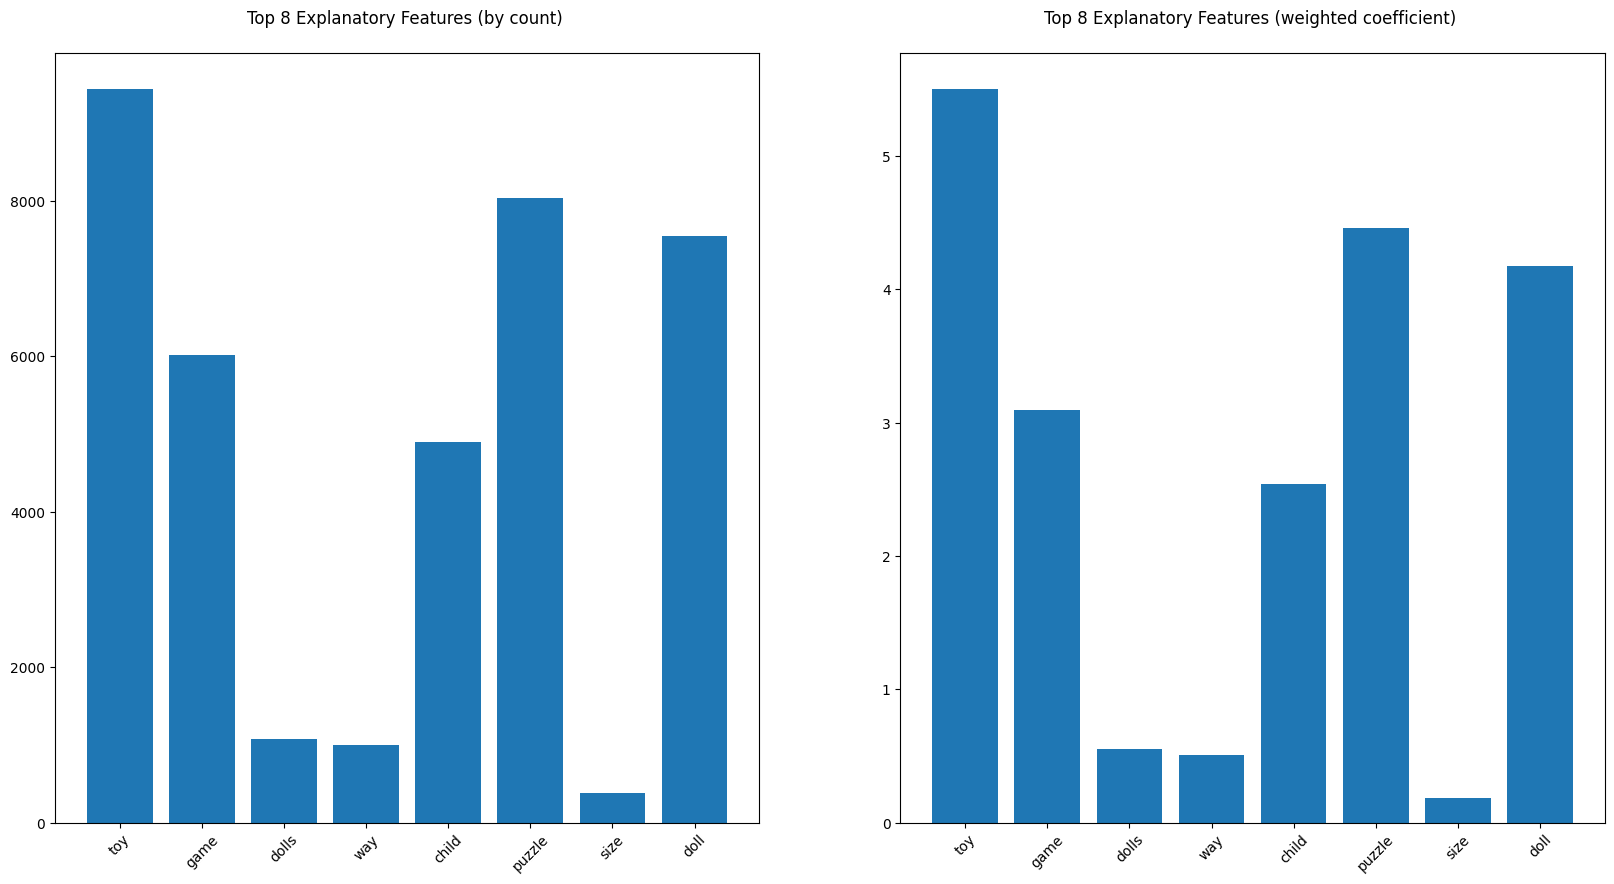

In [12]:
from cornac.visualization import Visualization
my_plots = Visualization()

# create plots across the dataset
filtered_df = my_plots.create_aggregate_feature_importance_plot(
    explanations, type="bar", top_k=8, save_plot=False)

## Experiment

In [ ]:
from cornac.datasets import amazon_toy
from cornac.data.reader import Reader
from cornac.eval_methods import RatioSplit
from cornac.data.sentiment import SentimentModality

from cornac.models import EFM
from cornac.explainer import Exp_EFM
from cornac.experiment import Experiment_Explainers

from cornac.metrics_explainer import (Metric_Exp_DIV as DIV, Metric_Exp_EnDCG as EnDCG)

rating = amazon_toy.load_feedback(fmt="UIRT", reader=Reader(min_user_freq=50))
sentiment_data = amazon_toy.load_sentiment(reader=Reader(min_user_freq=50))
rating = rating[:500]

md = SentimentModality(data=sentiment_data)

eval_method = RatioSplit(
    data=rating,
    group_by="user",
    chrono=True,
    sentiment=md,
    test_size=0.2,
    exclude_unknowns=True,
    verbose=True,
)

efm = EFM(max_iter=20)
efm_exp = Exp_EFM(rec_model=efm, dataset=eval_method.train_set)

# initialize the models and metrics
rec_exp_pairs = [(efm, efm_exp)]
exp_metrics = [DIV(), EnDCG()]

# initialize experiment
experiment = Experiment_Explainers(
    eval_method=eval_method,
    models=rec_exp_pairs,
    metrics=exp_metrics,
    distribution=False,
    eval_train=True,
)
experiment.run()

In [ ]:
from cornac.experiment import Experiment_Explainers
from cornac.models import EFM, MTER
from cornac.explainer import Exp_EFM, Exp_MTER

from cornac.datasets import amazon_toy
from cornac.data.reader import Reader
from cornac.eval_methods import StratifiedSplit
from cornac.data.sentiment import SentimentModality
from cornac.metrics_explainer import Metric_Exp_DIV

rating = amazon_toy.load_feedback(fmt="UIRT", reader=Reader(min_user_freq=50))
sentiment_data = amazon_toy.load_sentiment(reader=Reader(min_user_freq=50))

md = SentimentModality(data=sentiment_data)

eval_method = StratifiedSplit(
    data=rating,
    group_by="user",
    chrono=True,
    sentiment=md,
    test_size=0.2,
    exclude_unknowns=True,
    verbose=True,
)

# initialize recommenders and explainers
efm = EFM(max_iter=20)
efm_exp = Exp_EFM(rec_model=efm, dataset=eval_method.train_set)

mter = MTER(max_iter=20)
mter_exp = Exp_MTER(rec_model=mter, dataset=eval_method.train_set)

# fit the recommenders
efm.fit(eval_method.train_set)
mter.fit(eval_method.train_set)

# initialize metrics
div = Metric_Exp_DIV()

# initialize experiment
rec_exp_pairs = [(efm, efm_exp), (mter, mter_exp)]
exp_metrics = [div]

experiment = Experiment_Explainers(eval_method=eval_method, models=rec_exp_pairs, metrics=exp_metrics, distribution=False,  eval_train=True)
experiment.run()